In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import june_gloom
june_gloom.init()
june_gloom.noaa_clean()
june_gloom.feature_sst_anomaly()
from june_gloom import df_lax, df_enso_sst

In [5]:
df_enso_sst.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                       'Nov', 'Dec']

In [8]:
df_lax.columns

Index(['YEARMODA', 'TEMP', 'DEWP', 'SLP', 'STP', 'VISIB', 'WDSP', 'MXSPD',
       'GUST', 'MAX', 'MIN', 'PRCP', 'SNDP', 'FRSHTT', 'month', 'year',
       'dummy', 'sst_anomaly'],
      dtype='object')

In [26]:
def impute_rain(col):
    if col == 0:
        return 0
    elif col > 0:
        return 1
    else:
        return np.nan

In [27]:
df_lax['rain?'] = df_lax['PRCP'].apply(impute_rain)

In [28]:
x_label = df_lax['DEWP']
y_label = df_lax['WDSP']
c_label = df_lax['rain?']

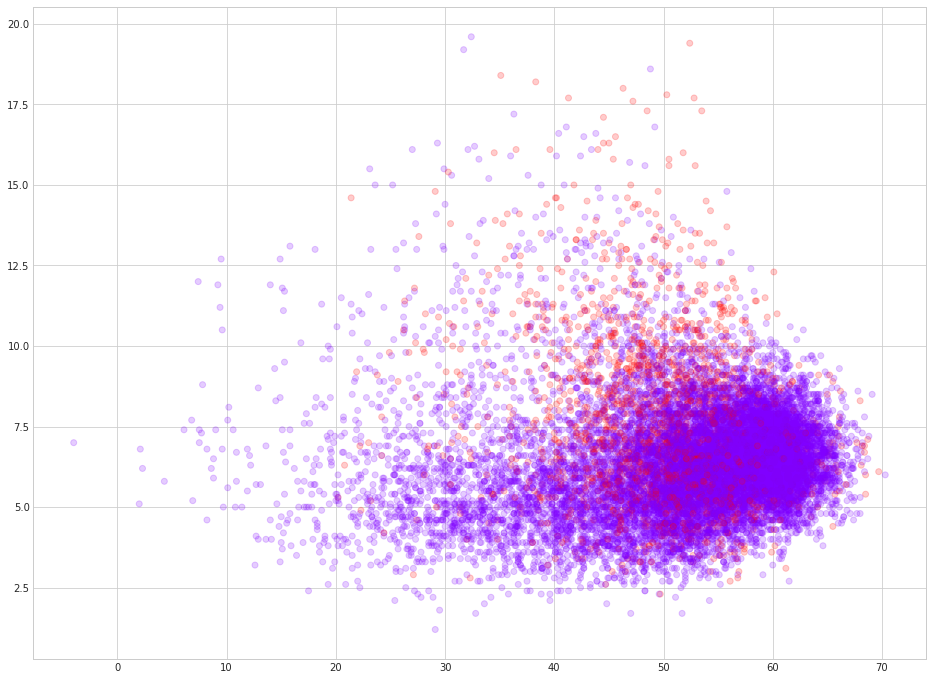

In [29]:
plt.figure(figsize=(16, 12))
sns.set_style('whitegrid')

plt.scatter(x_label, y_label, c=c_label, cmap='rainbow', alpha=0.2)

In [30]:
from sklearn.cluster import KMeans

In [31]:
kmeans = KMeans(n_clusters=4)

In [35]:
kmeans.fit(df_lax[['DEWP', 'WDSP']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
kmeans.cluster_centers_

array([[ 60.17544248,   6.60714286],
       [ 42.73371124,   6.44014672],
       [ 52.33982345,   6.48597602],
       [ 27.77159905,   6.31662689]])

In [38]:
kmeans.labels_

array([3, 3, 1, ..., 2, 2, 2], dtype=int32)

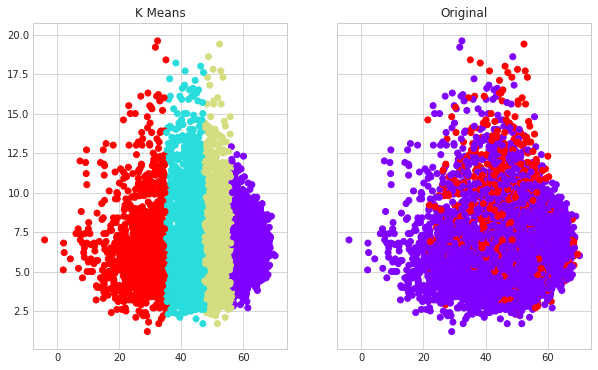

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(x_label, y_label, c=kmeans.labels_, cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(x_label, y_label, c=c_label, cmap='rainbow')